<a href="https://colab.research.google.com/github/aniketinamdar/Twitter-Sentiment-Analysis-using-Support-Vector-Machine-/blob/main/RandomForestClassifierSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import numpy as np

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Twitter_Data.csv',nrows=40000)

In [ ]:
df.size

80000

In [ ]:
df.shape

(40000, 2)

In [ ]:
df.head

<bound method NDFrame.head of                                               clean_text  category
0      when modi promised “minimum government maximum...        -1
1      talk all the nonsense and continue all the dra...         0
2      what did just say vote for modi  welcome bjp t...         1
3      asking his supporters prefix chowkidar their n...         1
4      answer who among these the most powerful world...         1
...                                                  ...       ...
39995  these shameless took years understand what gst...         0
39996  and forget civil war any anti national naxal a...         1
39997  legitimate arrest antony making nirav modi vij...        -1
39998  yes have put jail from last last 3yr work only...         1
39999  enquiring about the health senior citizen the ...         1

[40000 rows x 2 columns]>

In [ ]:
df.fillna(0, inplace=True)

<Axes: ylabel='count'>

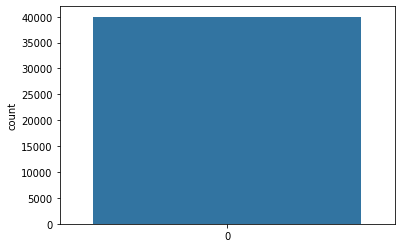

In [ ]:
sns.countplot(df.category)

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text_transformation(df['clean_text'])

LookupError: ignored

In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [ ]:
X = df['clean_text']
y = df['category']

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

ValueError: ignored